In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [16]:
df = pd.read_csv("Data/loan_data.csv")

In [17]:
df.head(10)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
6,26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1
7,24.0,female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No,1
8,24.0,female,Associate,100684.0,3,RENT,35000.0,PERSONAL,8.90,0.35,2.0,544,No,1
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1


In [18]:
df[df['person_income'] % 1 != 0].shape

(0, 14)

In [19]:
# Some of these aren't actually floats, so we can make them integers.
df["person_income"] = df["person_income"].astype(int)
df["person_age"] = df["person_age"].astype(int)
df["loan_amnt"] = df["loan_amnt"].astype(int)
df["cb_person_cred_hist_length"] = df["cb_person_cred_hist_length"].astype(int)
# pd.set_option('display.float_format', '{:.0f}'.format)

In [20]:
df.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [21]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int64  
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  int64  
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  int64  
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  int64  
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [23]:
# Brief overview doesn't seem to show irregular data here.
# Mean of loan_status is 0.22, suggesting significant imbalance therefore requiring SMOTE.

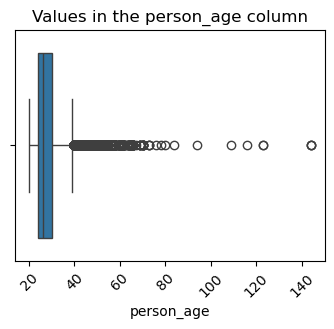

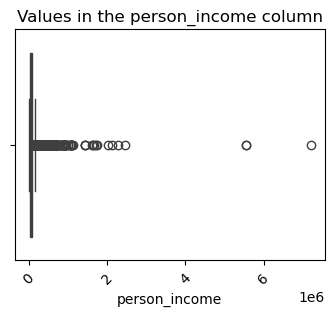

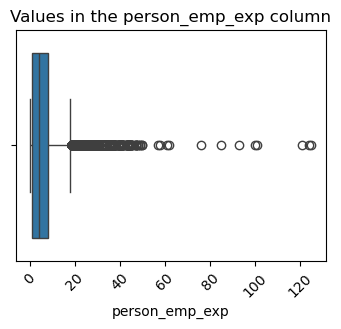

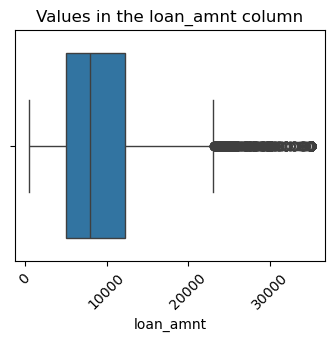

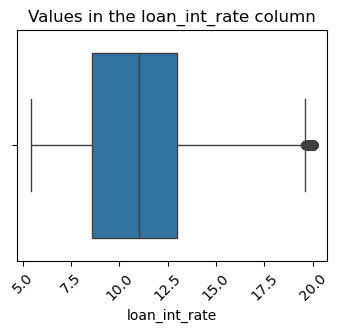

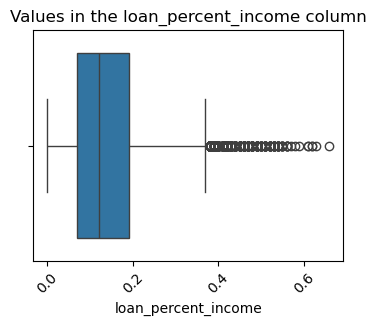

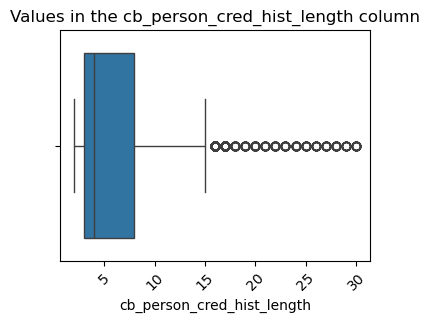

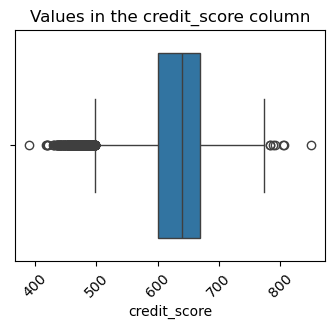

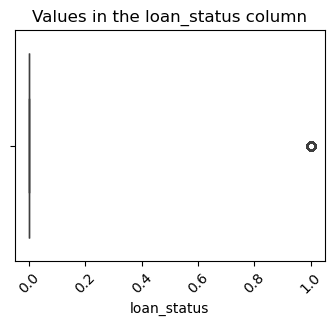

In [24]:
# Displaying the different categorical values for each of the object (string) type columns.
numCols = df.select_dtypes(include = ["int64", "float64"])

for col in numCols:
    plt.figure(figsize = (4, 3))
    plt.xticks(rotation = 45)
    sns.boxplot(data = df, x = col)
    plt.title(f'Values in the {col} column')
    plt.show()

In [12]:
# person_income varies wildly, so let's drop some of them.
highIncome  = df["person_income"].quantile(0.98)

df = df[(df["person_income"] < highIncome)]
df.shape

(44100, 14)

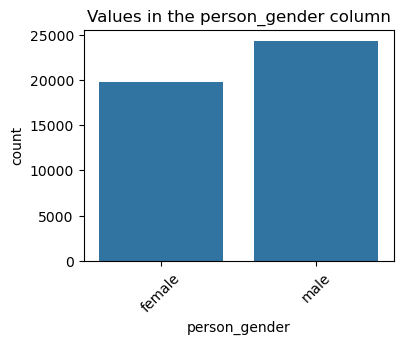

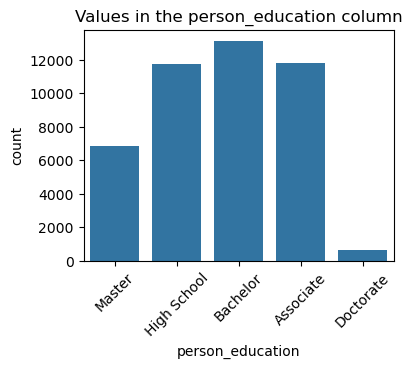

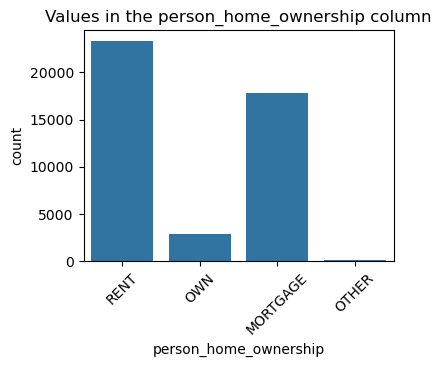

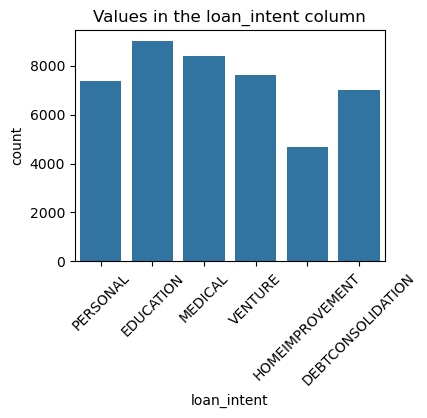

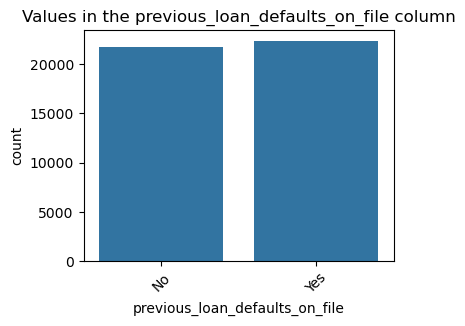

In [13]:
# Displaying the different categorical values for each of the object (string) type columns.
objectCols = df.select_dtypes(include=['object'])

for col in objectCols:
    plt.figure(figsize = (4, 3))
    plt.xticks(rotation = 45)
    sns.countplot(data = df, x = col)
    plt.title(f'Values in the {col} column')
    plt.show()

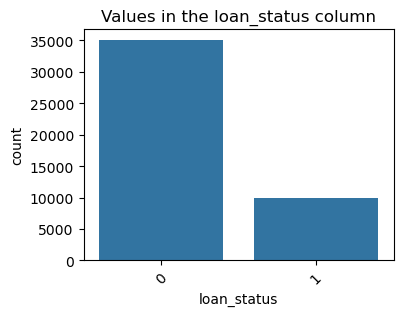

In [38]:
# (also one for the target variable)
plt.figure(figsize = (4, 3))
plt.xticks(rotation = 45)
sns.countplot(data = df, x = "loan_status")
plt.title(f'Values in the loan_status column')
plt.show()

In [ ]:
le = LabelEncoder() # Label encoding converts strings to numbers, and is best suited to ordinal data.
# In this dataset, person_education is ordinal as a person's level of education goes in order of Bachelors, Masters, etc.
df["person_education"] = le.fit_transform(df["person_education"])
df["person_education"].head(3)

0    4
1    3
2    3
Name: person_education, dtype: int64

In [29]:
# One-hot encoding also converts strings to numbers, but to do so it creates new Boolean columns for each
# of the original values in the column, removing the original column in the process.
encodedDf = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns)

encodedDf.dtypes
# It can be seen that there are many more columns now, as one has been created for each categorical
# value in the object columns.

person_age                            float64
person_education                        int64
person_income                         float64
person_emp_exp                          int64
loan_amnt                             float64
loan_int_rate                         float64
loan_percent_income                   float64
cb_person_cred_hist_length            float64
credit_score                            int64
loan_status                             int64
person_gender_female                     bool
person_gender_male                       bool
person_home_ownership_MORTGAGE           bool
person_home_ownership_OTHER              bool
person_home_ownership_OWN                bool
person_home_ownership_RENT               bool
loan_intent_DEBTCONSOLIDATION            bool
loan_intent_EDUCATION                    bool
loan_intent_HOMEIMPROVEMENT              bool
loan_intent_MEDICAL                      bool
loan_intent_PERSONAL                     bool
loan_intent_VENTURE               

<Axes: >

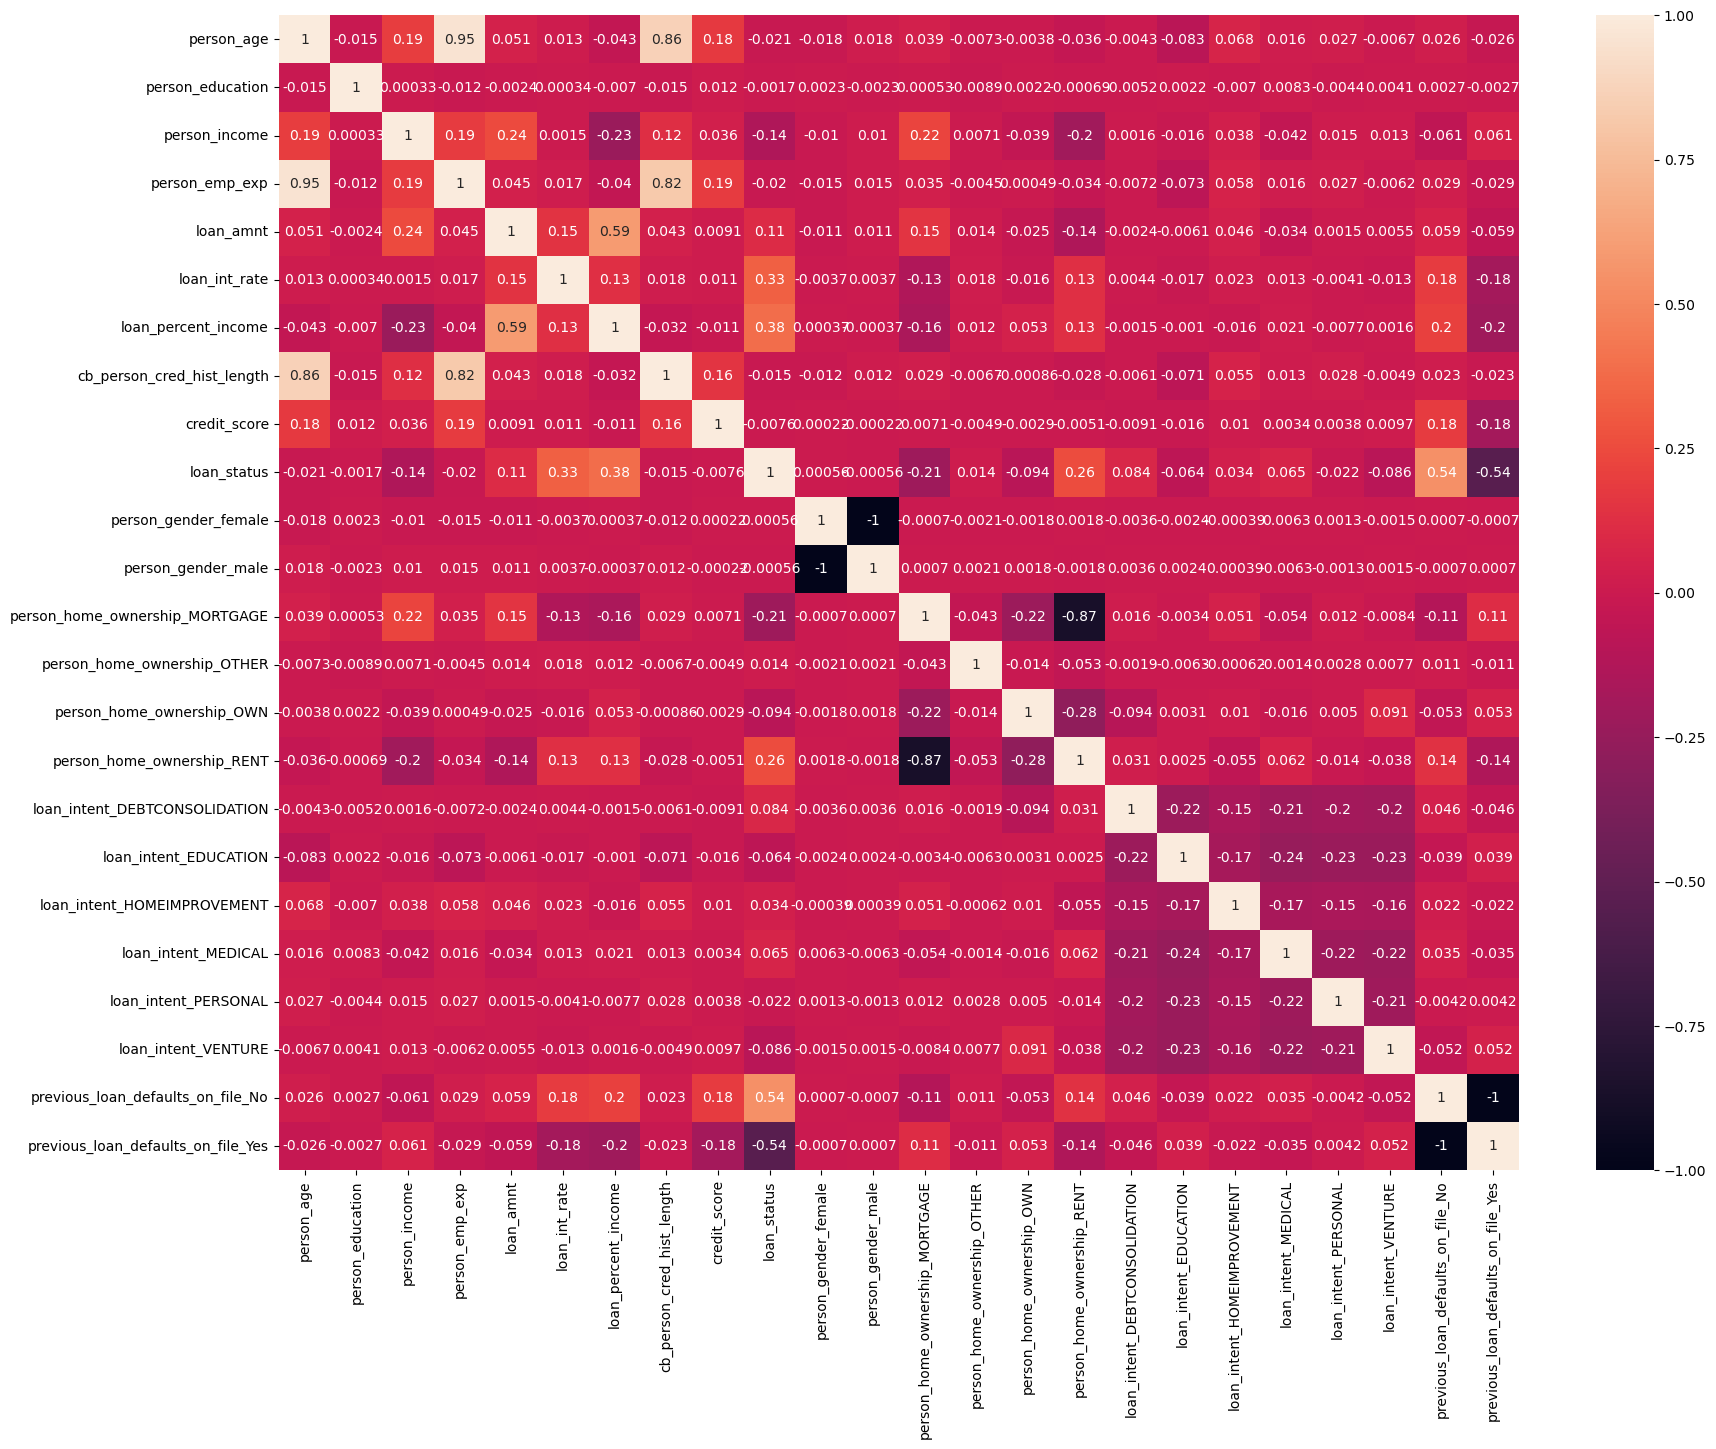

In [32]:
plt.figure(figsize=(20,15))
sns.heatmap(encodedDf.corr(), annot = True)

<Axes: >

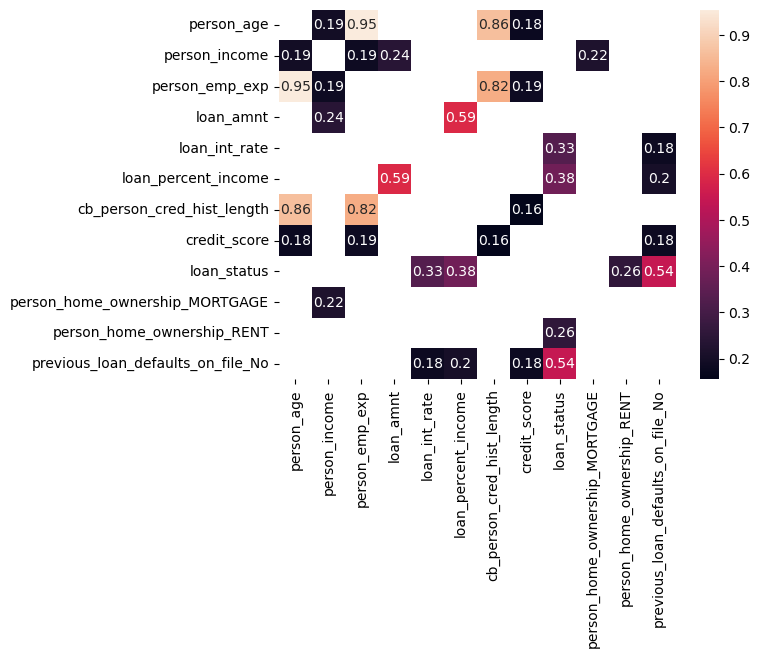

In [ ]:
# The matrix is extremely large due to the columns produced by one-hot encoding. 
# While not necessary, it can be filtered to produce a smaller matrix for easier viewing.
### Maybe don't use this.
filtered_matrix = encodedDf.corr().where(
    (encodedDf.corr() > 0.15) & (encodedDf.corr() < 1.0), 
    np.nan
)

filtered_matrix = filtered_matrix.dropna(how='all', axis=0).dropna(how='all', axis=1)

sns.heatmap(filtered_matrix, annot = True)